# 3. Data Analysis

> * input이 될 X에 대한 분석
>   * 전체 데이터 수:  4,500
>   * 이미지 사이즈: (384, 512)
>   * 한 사람당 사진의 개수: 7 [마스크 착용 5장, 이상하게 착용(코스크, 턱스크) 1장, 미착용 1장]
>   * 분석 대상이 되는 객체의 위치
>   * RGB 채너별 통계값
> * target이 될 y에 대한 분석 
>   * y값의 독립적 분포 
>       * ex) y_1의 분포는?
>   * y값 들간의 관계 분포 
>       * ex) y_1, y_2 정보를 섞은 분포는?
> * X, y 관계를 확인할 수 있는 분석
>   * X특성과 y의 특성 간의 분포 차이는 어떻게 있을까요??
>   * 이미지 사이즈와 y 특성의 관계
>   * RGB 통계값과 y 특성의 관계
>   * 객체의 위치와 y 특성의 관계
>   * 데이터의 노이즈 확인 
>       * ex) y 값이 잘못 부여된것이 있을까??

In [1]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from PIL import Image
from tqdm import tqdm

os.chdir("../../")

## 3.1. Meta info

1. 남/녀 비율
2. 나이대 비율: `<30`, `>=30 and <60`, `>=60`
3. 정확히 labeling 되었는지?
4. 중복된 데이터 있는지?

In [2]:
data_dir = os.path.join(os.getcwd(), 'input', 'data')
train_data_dir = os.path.join(data_dir, 'train')
train_data_meta_info = pd.read_csv(os.path.join(train_data_dir, 'train.csv'))


In [3]:
train_data_meta_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [4]:
train_data_meta_info.describe(include='all')

,id,gender,race,age,path
count,2700,2700,2700,2700.000000,2700
unique,2699,2,1,NaN,2700
top,003397,female,Asian,NaN,001644_male_Asian_22
freq,2,1658,2700,NaN,1
mean,NaN,NaN,NaN,37.708148,NaN
std,NaN,NaN,NaN,16.985904,NaN
min,NaN,NaN,NaN,18.000000,NaN
25%,NaN,NaN,NaN,20.000000,NaN
50%,NaN,NaN,NaN,36.000000,NaN
75%,NaN,NaN,NaN,55.000000,NaN


In [5]:
is_dup_id = train_data_meta_info['id'].duplicated()
dup_id = train_data_meta_info[is_dup_id]['id']

dup_datas_df = train_data_meta_info.loc[train_data_meta_info['id'] == dup_id.values[0]]
print(dup_datas_df)

          id  gender   race  age                    path
1366  003397  female  Asian   20  003397_female_Asian_20
1367  003397  female  Asian   19  003397_female_Asian_19


특정 id가 중복되었지만, 나이가 다르다.   
id를 기준으로 구분을 하면 안 되겠다.

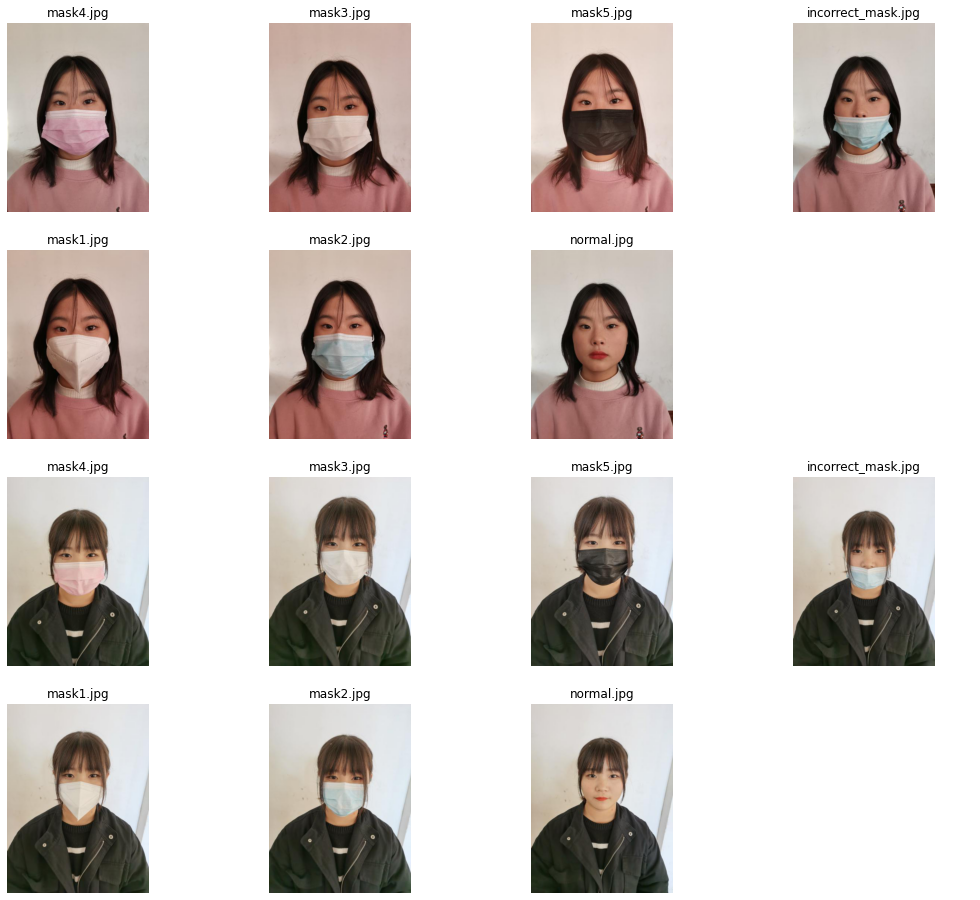

In [6]:
image_data_dir =  os.path.join(train_data_dir, 'images')

dup_datas_paths = dup_datas_df['path'].values
fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.flatten()
for i in range(len(axes)): axes[i].axis('off')

for path_idx, path in enumerate(dup_datas_paths):
    img_data_path = os.path.join(image_data_dir, path)
    titles = os.listdir(img_data_path)

    title_idx = 0
    for title in titles:
        if title[0] == '.':
            continue

        image_file_path = os.path.join(img_data_path, title)
        image_pil = Image.open(image_file_path)
        image = np.array(image_pil)
        axes_index = path_idx * 8 + title_idx
        axes[axes_index].imshow(image)
        axes[axes_index].set_title(title)
        title_idx += 1

plt.show()

In [7]:
train_data_meta_info.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


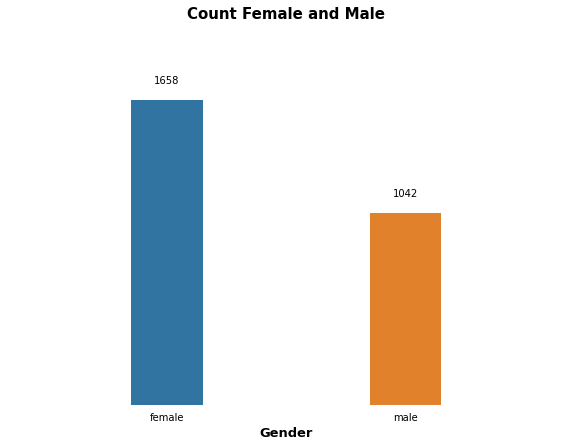

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.countplot(
    x='gender', data=train_data_meta_info,
    ax=ax,
    order=sorted(train_data_meta_info['gender'].unique()),
    )
        
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.set(frame_on=False)
ax.tick_params(bottom=False)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Gender', fontsize=13, fontweight='semibold')

def change_width(ax, new_width):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_width
        patch.set_width(new_width)
        patch.set_x(patch.get_x() + diff * .5)
        patch.set_linewidth(2.0)


def insert_value(ax):
    for idx, patch in enumerate(ax.patches):
        height = patch.get_height()
        ax.text(
            patch.get_x() + patch.get_width() / 2.,
            height + 95, 
            height, 
            ha='center', 
            size=10)

insert_value(ax)
change_width(ax, 0.3)

ax.set_title("Count Female and Male", fontsize=15, fontweight='semibold')
ax.margins(0.15, 0.25)

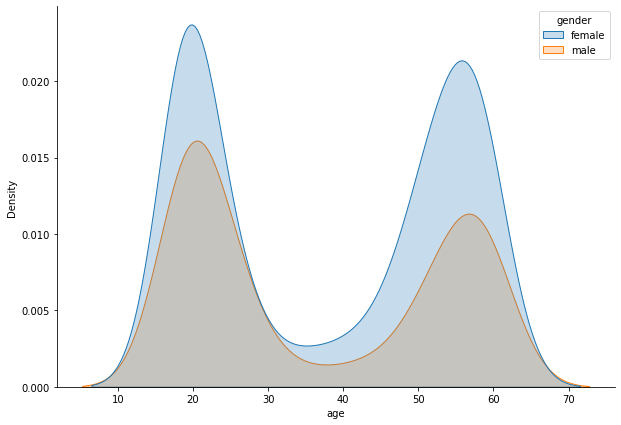

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.kdeplot(
    x='age',
    data=train_data_meta_info,
    ax=ax,
    hue='gender',
    fill=True,
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [10]:
def set_age_s(age):
    if age < 30:
        return 0
    elif age < 60:
        return 1
    else:
        return 2

train_data_meta_info["age's"] = train_data_meta_info['age'].apply(lambda x : set_age_s(x))

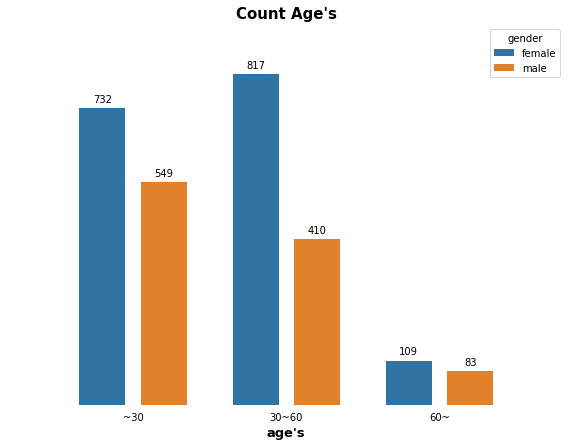

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.countplot(
    x="age's", data=train_data_meta_info,
    ax=ax,
    order=sorted(train_data_meta_info["age's"].unique()),
    hue='gender',
    )
        
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.set(frame_on=False)
ax.tick_params(bottom=False)
ax.set_xticklabels(['~30', '30~60', '60~'])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel("age's", fontsize=13, fontweight='semibold')

def change_width(ax, new_width):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_width
        patch.set_width(new_width)
        patch.set_x(patch.get_x() + diff * .5)
        patch.set_linewidth(2.0)


def insert_value(ax):
    for idx, patch in enumerate(ax.patches):
        height = patch.get_height()
        ax.text(
            patch.get_x() + patch.get_width() / 2.,
            height + 15, 
            height, 
            ha='center', 
            size=10)

insert_value(ax)
change_width(ax, 0.3)

ax.set_title("Count Age's", fontsize=15, fontweight='semibold')
ax.margins(0.15, 0.15)

## 3.2. image data

In [12]:
# image_path_class = pd.DataFrame(None, columns = ['path', 'label'])

# for idx, row in tqdm(train_data_meta_info.iterrows(), total=train_data_meta_info.shape[0]):
#     for img_file in os.listdir(os.path.join(image_data_dir, row['path'])):
#         if img_file[0] == '.':
#             continue
        
#         if img_file.split('.')[0] == 'normal':
#             mask = 2
#         elif img_file.split('.')[0] == 'incorrect_mask':
#             mask = 1
#         else:
#             mask = 0

#         gender = 0 if row['gender'] == 'male' else 1
#         data = {
#             'path': os.path.join(image_data_dir, row['path'], img_file),
#             'label': mask * 6 + gender * 3 + row["age's"]
#         }

#         image_path_class = image_path_class.append(data, ignore_index=True)

In [13]:
# image_path_class.to_csv(os.path.join(train_data_dir, 'labeling.csv'))
image_path_class = pd.read_csv(os.path.join(train_data_dir, 'labeling.csv')).drop('Unnamed: 0', axis=1)

In [14]:
image_path_class.head(5)

,path,label
0,/opt/ml/input/data/train/images/000001_female_...,4
1,/opt/ml/input/data/train/images/000001_female_...,4
2,/opt/ml/input/data/train/images/000001_female_...,4
3,/opt/ml/input/data/train/images/000001_female_...,10
4,/opt/ml/input/data/train/images/000001_female_...,4


In [15]:
image_path_class.describe(include='all')

,path,label
count,18900,18900.000000
unique,18900,NaN
top,/opt/ml/input/data/train/images/003787_female_...,NaN
freq,1,NaN
mean,NaN,5.010317
std,NaN,4.660533
min,NaN,0.000000
25%,NaN,1.000000
50%,NaN,4.000000
75%,NaN,7.000000


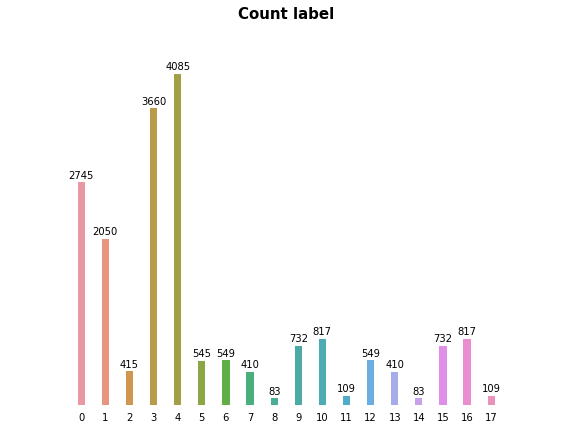

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.countplot(
    x="label", data=image_path_class,
    ax=ax,
    order=sorted(image_path_class["label"].unique()),
    )
        
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.set(frame_on=False)
ax.tick_params(bottom=False)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel("")

def change_width(ax, new_width):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_width
        patch.set_width(new_width)
        patch.set_x(patch.get_x() + diff * .5)
        patch.set_linewidth(2.0)


def insert_value(ax):
    for idx, patch in enumerate(ax.patches):
        height = patch.get_height()
        ax.text(
            patch.get_x() + patch.get_width() / 2.,
            height + 55, 
            height, 
            ha='center', 
            size=10)

insert_value(ax)
change_width(ax, 0.3)

ax.set_title("Count label", fontsize=15, fontweight='semibold')
ax.margins(0.15, 0.15)

label의 0-5(wear), 6-11(incorrect), 12-17(normal)의 분포는 같다.

나이대별 성별의 분포이다.

In [18]:
image_pil_list = [[] for _ in range(18)]

In [19]:
for idx, row in tqdm(image_path_class.iterrows(), total=image_path_class.shape[0]):
    image_pil = Image.open(row['path'])
    image_label = image_path_class['label'][idx]
    image_pil_list[image_label].append(image_pil)


100%|██████████| 18900/18900 [00:03<00:00, 5188.26it/s]


In [ ]:
image_element_np = np.array(Image.open(image_path_class['path'][0]))
print(f'image shape: {image_element_np.shape}')

In [ ]:
for row, image_pil_list_class in enumerate(image_pil_list):
    print(f"Convert label {row} image to nd.array")
    for idx, image_pil in tqdm(enumerate(image_pil_list_class), total=len(image_pil_list_class)):
        image_pil = np.array(image_pil)

In [ ]:
image_pil_list_class[0]